<a href="https://colab.research.google.com/github/hanifkamil/mysite/blob/master/NLP_Submission_Rockpaperscissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile,os
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-12-07 01:35:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.30MB/s    in 3m 12s  

2020-12-07 01:38:30 (1.61 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir)

['scissors', 'paper', 'README_rpc-cv-images.txt', 'rock']

In [ ]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
 
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
# mengimplementasikan augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'constant',
                    cval = 0.2,
                    validation_split = 0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(170, 170), 
        #class_mode='sparse',
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(170, 170),
        #class_mode='sparse',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(170, 170, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# compile model dengan 'adamax' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [ ]:
# melatih model
history = model.fit(
                train_generator,
                steps_per_epoch=32,
                epochs=20,
                validation_data=validation_generator,
                validation_steps=8,
                verbose=2)

Epoch 1/20
32/32 - 35s - loss: 0.0548 - accuracy: 0.9859 - val_loss: 0.0845 - val_accuracy: 0.9688
Epoch 2/20
32/32 - 35s - loss: 0.0602 - accuracy: 0.9799 - val_loss: 0.0966 - val_accuracy: 0.9609
Epoch 3/20
32/32 - 36s - loss: 0.0529 - accuracy: 0.9893 - val_loss: 0.1318 - val_accuracy: 0.9570
Epoch 4/20
32/32 - 35s - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.1121 - val_accuracy: 0.9727
Epoch 5/20
32/32 - 35s - loss: 0.0322 - accuracy: 0.9920 - val_loss: 0.1081 - val_accuracy: 0.9688
Epoch 6/20
32/32 - 39s - loss: 0.0344 - accuracy: 0.9912 - val_loss: 0.0666 - val_accuracy: 0.9766
Epoch 7/20
32/32 - 36s - loss: 0.0394 - accuracy: 0.9859 - val_loss: 0.1075 - val_accuracy: 0.9609
Epoch 8/20
32/32 - 35s - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0897 - val_accuracy: 0.9688
Epoch 9/20
32/32 - 35s - loss: 0.0501 - accuracy: 0.9799 - val_loss: 0.2211 - val_accuracy: 0.9180
Epoch 10/20
32/32 - 35s - loss: 0.0700 - accuracy: 0.9779 - val_loss: 0.0709 - val_accuracy: 0.9922
Epoch 11/

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

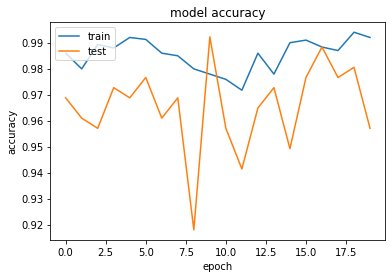

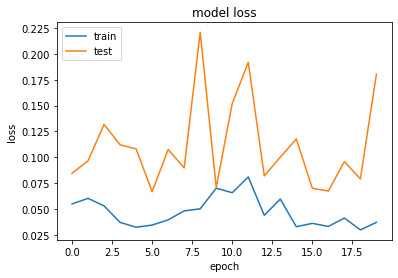

In [ ]:
# visualisasi accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# visualisasi loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving GUNTING.jpg to GUNTING.jpg
GUNTING.jpg
scissors


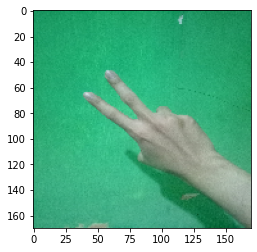

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(170,170))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')